- > Sentimental analysis is the process of  using natural language processing. Text analysis, and statistics to analyse customer sentiments. The best business understand the sentiment of their customers. What people are saying it and what they mean.
Customer sentiments can be found in tweets, comments, reviews or other places where people mention your brands. Sentiment analysis is the domain of understanding these emotions with software, and it's a must understand topic for developers and business leaders in the modern workplace. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import wordcloud_cli

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [2]:
from textblob import TextBlob
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.sentiment.util import *

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
trump=pd.read_csv("/content/drive/MyDrive/Projects/Sentimental Analysis NLP/hashtag_donaldtrump.csv",lineterminator='\n')
biden=pd.read_csv("/content/drive/MyDrive/Projects/Sentimental Analysis NLP/hashtag_joebiden.csv",lineterminator='\n')

In [4]:
trump.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,2011-08-23 15:33:45,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,2011-07-08 13:12:20,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",2007-08-26 05:56:11,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",2017-02-05 21:32:17,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",2009-06-15 19:05:35,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


In [5]:
biden.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,2011-08-23 15:33:45,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:18,1.316529e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",2012-09-08 01:03:57,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,2015-08-30 19:38:21,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566
3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,NaN,2017-01-25 14:16:17,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,2018-08-24 01:49:01,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132


In [6]:
print(trump.shape)
print(biden.shape)

(970919, 21)
(776886, 21)


In [7]:
trump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970919 entries, 0 to 970918
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            970919 non-null  object 
 1   tweet_id              970919 non-null  float64
 2   tweet                 970919 non-null  object 
 3   likes                 970919 non-null  float64
 4   retweet_count         970919 non-null  float64
 5   source                970043 non-null  object 
 6   user_id               970919 non-null  float64
 7   user_name             970903 non-null  object 
 8   user_screen_name      970919 non-null  object 
 9   user_description      869653 non-null  object 
 10  user_join_date        970919 non-null  object 
 11  user_followers_count  970919 non-null  float64
 12  user_location         675966 non-null  object 
 13  lat                   445719 non-null  float64
 14  long                  445719 non-null  float64
 15  

In [8]:
biden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776886 entries, 0 to 776885
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            776886 non-null  object 
 1   tweet_id              776886 non-null  float64
 2   tweet                 776886 non-null  object 
 3   likes                 776886 non-null  float64
 4   retweet_count         776886 non-null  float64
 5   source                776173 non-null  object 
 6   user_id               776886 non-null  float64
 7   user_name             776868 non-null  object 
 8   user_screen_name      776886 non-null  object 
 9   user_description      694880 non-null  object 
 10  user_join_date        776886 non-null  object 
 11  user_followers_count  776886 non-null  float64
 12  user_location         543095 non-null  object 
 13  lat                   355293 non-null  float64
 14  long                  355293 non-null  float64
 15  

- > finally we don't have null values in tweets column so no need to worry

In [9]:
## concat the two data frame to which tweets for whome we are adding a flag that is name column
trump['candidate']='Trump'

In [10]:
trump.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at,candidate
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,2011-08-23 15:33:45,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,Trump
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,2011-07-08 13:12:20,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,Trump
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",2007-08-26 05:56:11,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,Trump
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",2017-02-05 21:32:17,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591,Trump
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",2009-06-15 19:05:35,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,Trump


In [11]:
## same for biden also
biden['candidate']='Biden'

In [12]:
biden.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at,candidate
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,2011-08-23 15:33:45,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,Biden
1,2020-10-15 00:00:18,1.316529e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",2012-09-08 01:03:57,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283,Biden
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,2015-08-30 19:38:21,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566,Biden
3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,NaN,2017-01-25 14:16:17,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849,Biden
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,2018-08-24 01:49:01,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132,Biden


In [13]:
### Now conactening
df=pd.concat([trump,biden])

In [14]:
df.sort_values(by='created_at')

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at,candidate
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,2011-08-23 15:33:45,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,Trump
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,2011-08-23 15:33:45,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,Biden
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,2011-07-08 13:12:20,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,Trump
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",2007-08-26 05:56:11,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,Trump
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",2017-02-05 21:32:17,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591,Trump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970917,2020-11-08 23:59:54,1.325589e+18,"@sammelbis1998 @iheartmindy @bnorthg First, yo...",0.0,0.0,Twitter for iPad,7.687811e+08,Debra,drdeblk,MD. Autism specialist. Film lover. #DumpTrump2020,2012-08-20 03:53:11,1079.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 17:47:56.012674,Trump
970918,2020-11-08 23:59:55,1.325589e+18,OK just had to do it !\n#Trump #CatapultTrump ...,105.0,28.0,Twitter Web App,4.519791e+08,Dunken K Bliths,DunkenKBliths,"""Tesla owner's will be followed back""\n\n#Mach...",2012-01-01 08:04:29,12192.0,✔ Official Twitter Account,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 17:47:55.807500,Trump
922910,2020-11-08 23:59:56,1.325589e+18,@nbcbayarea Who doesn’t like dogs or any kind ...,1.0,1.0,Twitter for iPhone,1.182639e+08,Dianna Maria,DiannaMaria,"~ I am a very proud mom of a sweet, kind and c...",2010-02-28 03:31:22,1462.0,United States,39.783730,-100.445882,NaN,United States,North America,NaN,NaN,2020-11-09 17:46:06.939099,Trump
737089,2020-11-08 23:59:57,1.325589e+18,#JoeBiden 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂 https://t.co/Ym...,0.0,0.0,Twitter for iPhone,1.148479e+08,Nataša,PewPeeew,My brain consists of coping mechanisms and vin...,2010-02-16 20:10:35,33.0,Deutschland,51.083420,10.423447,NaN,Germany,Europe,NaN,NaN,2020-11-09 18:26:04.550843,Biden


# Exploratory Data Analysis

In [15]:
## Find the number of tweets recieved each of them

df.groupby('candidate')['tweet'].count().sort_values(ascending=False)

candidate
Trump    970919
Biden    776886
Name: tweet, dtype: int64

- > Trump got more tweets than biden

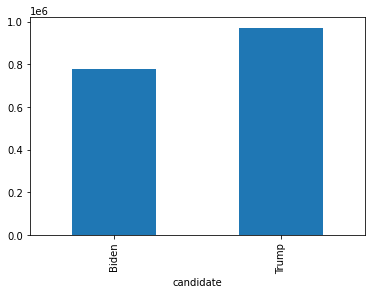

In [16]:
## Plotting the same
df.groupby('candidate')['tweet'].count().plot.bar()

In [17]:
## Comparison of likes
df.groupby('candidate')['likes'].sum()

candidate
Biden    7894066.0
Trump    7259572.0
Name: likes, dtype: float64

- > Biden got more likes than trump

Text(0, 0.5, 'Number of likes')

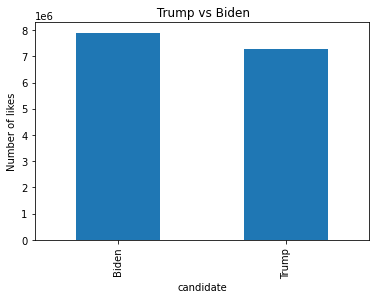

In [18]:
## plotting the same
df.groupby('candidate')['likes'].sum().plot.bar()
plt.title(" Trump vs Biden")
plt.ylabel('Number of likes')

In [19]:
## Distribution of country / most number of tweets from which country
df.country.value_counts()

United States of America    332495
United States                61905
United Kingdom               58051
India                        40091
Germany                      35379
                             ...  
Mali                             2
Northern Mariana Islands         1
Saint Lucia                      1
Lesotho                          1
East Timor                       1
Name: country, Length: 189, dtype: int64

- > United States of America and united states both are same so we rename both as simply US

In [20]:
## renaming to US
df.country=df.country.replace({'United States of America':'US','United States':'US'})

In [21]:
df.country.value_counts()

US                          394400
United Kingdom               58051
India                        40091
Germany                      35379
France                       35299
                             ...  
Mali                             2
Northern Mariana Islands         1
Saint Lucia                      1
Lesotho                          1
East Timor                       1
Name: country, Length: 188, dtype: int64

In [44]:
##  Top 10 countries with highest number of tweets - bar graph
df.groupby('country')['tweet'].count().sort_values(ascending=False).head(10)

country
US                394400
United Kingdom     58051
India              40091
Germany            35379
France             35299
Canada             27805
Italy              20076
Australia          14899
Mexico             10903
Turkey             10368
Name: tweet, dtype: int64

Text(0.5, 1.0, 'Top countries with highest number of tweets')

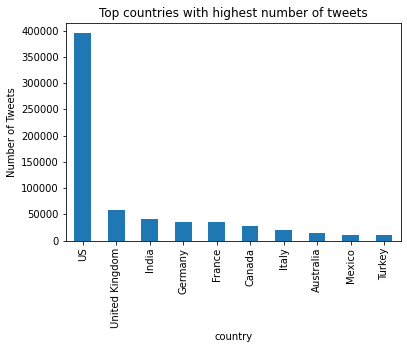

In [23]:
##  Top 10 countries with highest number of tweets - bar graph
df.groupby(['country'])['tweet'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('Number of Tweets')
plt.title('Top countries with highest number of tweets')

- > we have see tweets for biden and trump from each country

In [50]:
#@# top 10 contries having highest tweets storing in list
top10country=df.groupby('country')['tweet'].count().sort_values(ascending=False).head(10).index.tolist()
top10country

['US',
 'United Kingdom',
 'India',
 'Germany',
 'France',
 'Canada',
 'Italy',
 'Australia',
 'Mexico',
 'Turkey']

In [53]:
## getting country and candidate wise tweets
tweetdf=df.groupby(['country','candidate'])['tweet'].count().reset_index()
tweetdf

,country,candidate,tweet
0,Afghanistan,Biden,119
1,Afghanistan,Trump,101
2,Albania,Biden,61
3,Albania,Trump,74
4,Algeria,Biden,24
...,...,...,...
363,Yemen,Trump,93
364,Zambia,Biden,33
365,Zambia,Trump,38
366,Zimbabwe,Biden,59


In [55]:
## getting the country wise candidate and tweets which are there in top 10 conntries
tweetdf=tweetdf[tweetdf['country'].isin(top10country)]
tweetdf

,country,candidate,tweet
16,Australia,Biden,5534
17,Australia,Trump,9365
54,Canada,Biden,10809
55,Canada,Trump,16996
112,France,Biden,14610
113,France,Trump,20689
118,Germany,Biden,12761
119,Germany,Trump,22618
146,India,Biden,21532
147,India,Trump,18559


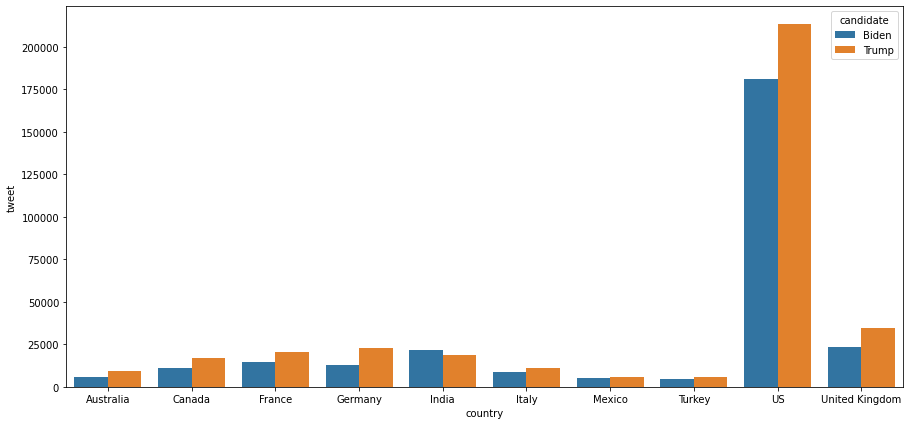

In [59]:
## plotting the same contry wise candidate and tweets 
plt.figure(figsize=(15,7))
sb.barplot(data=tweetdf,x='country',y='tweet',hue='candidate')

- > similarly as country we are checking with states
- > Tweets for biden and trump from each state

In [65]:
## Top 10 states with highest tweets
top10states=df.groupby('state')['tweet'].count().sort_values(ascending=False).head(10).index.tolist()
top10states

['California',
 'New York',
 'England',
 'Texas',
 'Florida',
 'District of Columbia',
 'Ile-de-France',
 'Pennsylvania',
 'Illinois',
 'Ontario']

In [69]:
## state and candiadte wise total tweets
tweetdf=df.groupby(['state','candidate'])['tweet'].count().reset_index()
tweetdf

,state,candidate,tweet
0,Aargau,Biden,1
1,Aargau,Trump,3
2,Abia,Biden,2
3,Abia,Trump,1
4,Abidjan,Biden,6
...,...,...,...
1298,Área Metropolitana de Lisboa,Trump,282
1299,Île-de-France,Biden,19
1300,Île-de-France,Trump,83
1301,Łódź Voivodeship,Biden,6


In [73]:
## getting the state wise candiadte and tweets info which are there in top 10 states with highest number of tweets
tweetdf=tweetdf[tweetdf['state'].isin(top10states)]
tweetdf

,state,candidate,tweet
206,California,Biden,25817
207,California,Trump,31149
349,District of Columbia,Biden,7055
350,District of Columbia,Trump,9684
386,England,Biden,16743
387,England,Trump,24111
410,Florida,Biden,13284
411,Florida,Trump,16568
518,Ile-de-France,Biden,7001
519,Ile-de-France,Trump,9393


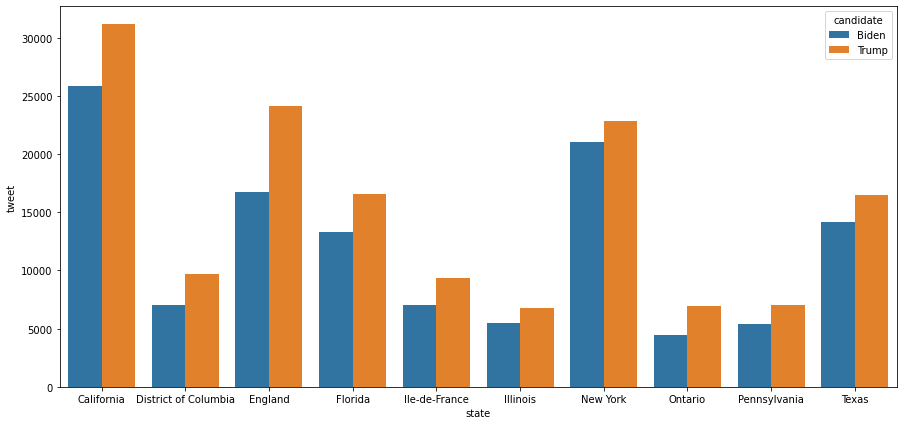

In [74]:
## plotting the graph for state and candidate wise tweets
plt.figure(figsize=(15,7))
sb.barplot(data=tweetdf,x='state',y='tweet',hue='candidate')

# Sentiment analysis of presidential elections

In [75]:
## initializing the lemmatizer
lm=WordNetLemmatizer()

In [76]:
## function to clean tweets

def clean(text):
    text = str(text).lower()
    text = re.sub('[^a-z]',' ',str(text))   #re.sub('[^a-z]',' ',str(text)) , if otherthan a-z is found remove it and ' '
    text = text.split()
    text = [lm.lemmatize(j) for j in text if j not in set(stopwords.words('english'))]
    text = ' '.join(str(k) for k in text)
    return text




- > create function to get polarity and subjectivity
- > subjectivity -- if the sentence is subjective or objective --- subjective sentence refer to personal opinions, emotions or people's judgement where objective sentence refers to factual information. It ranges from [0,1].

- > polarity -- float value that lies between [-1,1] where 1 means positive sentiment and -1 means negative sentiment


In [87]:
## function for subjectivity
def getsubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
 
## function for polarity

def getpolarity(text):
  return TextBlob(text).sentiment.polarity

## function for score we got from polarity
def getanalysis(score):
  if score < 0:
    return 'negative'
  elif score ==0:
    return 'neutral'
  else:
    return 'positive'


# Donald trump tweets sentiment analysis

In [80]:
## getting the tweets of trump

#df[df['candidate']=='Trump'].head()
## we can also do it like this
df.query('(candidate=="Trump")').head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at,candidate
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,2011-08-23 15:33:45,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,US,North America,Florida,FL,2020-10-21 00:00:00,Trump
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,2011-07-08 13:12:20,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,Trump
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",2007-08-26 05:56:11,1185.0,Portland,45.520247,-122.674195,Portland,US,North America,Oregon,OR,2020-10-21 00:00:00.746433060,Trump
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",2017-02-05 21:32:17,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591,Trump
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",2009-06-15 19:05:35,5393.0,Washington DC,38.894992,-77.036558,Washington,US,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,Trump


In [84]:
df.query('(candidate=="Trump")').sort_values('user_followers_count',ascending=False).drop_duplicates(['user_name'])[['tweet','country']]

,tweet,country
155941,"A menos de 2 semanas de las elecciones, #JoeBi...",NaN
913717,"Dalam pernyataan terbaru via Twitter, Trump ke...",Indonesia
825004,#Opinion | What appears to have cost #Trump th...,India
47094,#Trump uses own #COVID19 recovery to push retu...,China
916961,Six things #JoeBiden will likely do on immigra...,India
...,...,...
644024,Exit #trump !,NaN
96571,#Trump IN AZ.\nThis state needs GUTTING\nRich ...,NaN
795421,Il voto USA sancirà nuovi equilibri politici. ...,NaN
96623,#Trump really believes listening to the leader...,NaN


In [81]:
# getting trump tweets and sorting by user_followers_count drop duplicates of usernames 
# get tweet and country

trump_tweets = df.query('(candidate=="Trump")').sort_values('user_followers_count',ascending=False).drop_duplicates(['user_name'])[['tweet','country']]

## Getting the tweets of Us
trump_tweets = trump_tweets.dropna().loc[trump_tweets.country =='US']
trump_tweets.reset_index(inplace=True,drop=True)



In [ ]:
trump_tweets

,tweet,country
0,"Without a doubt, the #FourSeasons debacle is t...",US
1,"President Donald #Trump’s youngest daughter, T...",US
2,Woah. Have you read this article?\n\nAll the p...,US
3,The latest episode of #SNL tackled #DonaldTrum...,US
4,🇺🇸 #Decision2020: @JoeBiden firmará una serie ...,US
...,...,...
45518,@NBCNews You wanted it over by election nights...,US
45519,"Even if #Trump DID win this election, he would...",US
45520,"Twisted, pressed &amp; curled almost empty too...",US
45521,#Election2020\n#USElectionResults2020\n#Donald...,US


In [85]:
## Cleaning all tweets by applying clean function here on tweets column

trump_tweets['cleantext']= trump_tweets['tweet'].apply(clean)

In [86]:
trump_tweets.head()

,tweet,country,cleantext
0,"Without a doubt, the #FourSeasons debacle is t...",US,without doubt fourseasons debacle best part do...
1,"President Donald #Trump’s youngest daughter, T...",US,president donald trump youngest daughter tiffa...
2,Woah. Have you read this article?\n\nAll the p...,US,woah read article president debt donald trump ...
3,The latest episode of #SNL tackled #DonaldTrum...,US,latest episode snl tackled donaldtrump loss co...
4,🇺🇸 #Decision2020: @JoeBiden firmará una serie ...,US,decision joebiden firmar una serie de rdenes e...


In [88]:
## we are applying getsubjectivity function over cleantxt

trump_tweets['subjectivity']=trump_tweets['cleantext'].apply(getsubjectivity)

In [89]:
## we are applying getpolarity function over cleantext
trump_tweets['polarity']= trump_tweets['cleantext'].apply(getpolarity)

In [90]:
## we are applying getanalysis function over polarity 
trump_tweets['analysis']=trump_tweets['polarity'].apply(getanalysis)

In [91]:
trump_tweets.head()

,tweet,country,cleantext,subjectivity,polarity,analysis
0,"Without a doubt, the #FourSeasons debacle is t...",US,without doubt fourseasons debacle best part do...,0.483333,0.333333,positive
1,"President Donald #Trump’s youngest daughter, T...",US,president donald trump youngest daughter tiffa...,0.000000,0.000000,neutral
2,Woah. Have you read this article?\n\nAll the p...,US,woah read article president debt donald trump ...,0.000000,0.000000,neutral
3,The latest episode of #SNL tackled #DonaldTrum...,US,latest episode snl tackled donaldtrump loss co...,0.800000,-0.033333,negative
4,🇺🇸 #Decision2020: @JoeBiden firmará una serie ...,US,decision joebiden firmar una serie de rdenes e...,0.000000,0.000000,neutral


In [97]:
## Getting the percentage of analysis
trump_tweets.analysis.value_counts(normalize=True)*100

neutral     45.627485
positive    34.389210
negative    19.983305
Name: analysis, dtype: float64

Text(0, 0.5, 'Percentage of tweets')

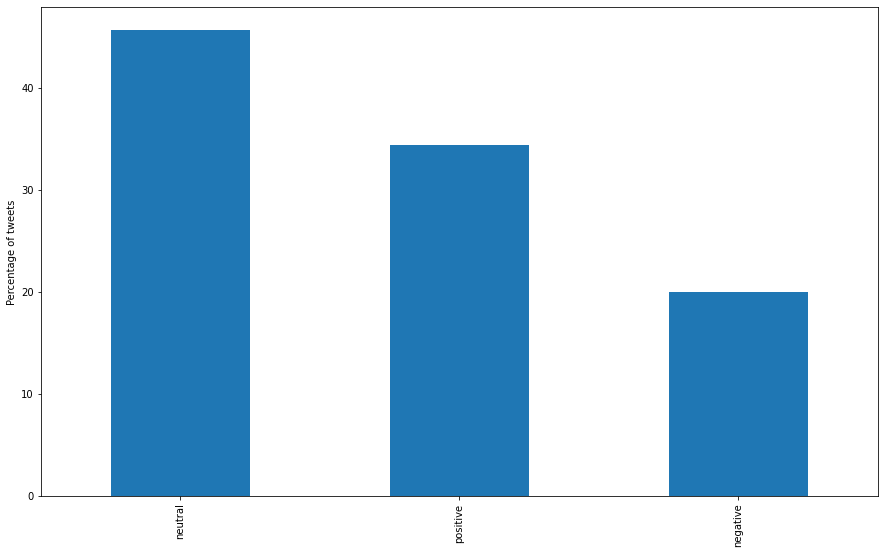

In [96]:
## Plotting the same
plt.figure(figsize=(15,9))
(trump_tweets.analysis.value_counts(normalize=True)*100).plot.bar()
plt.ylabel("Percentage of tweets")

In [123]:
## Building the wordcloud

from wordcloud import WordCloud, STOPWORDS

def wordcloud(wd_list):
  stopwords= set(STOPWORDS)
  all_words= ' '.join(text for text in wd_list)
  wordcloud= WordCloud(background_color='white',
                       stopwords=stopwords,
                       width=1500, height=800, max_words=100,
                       max_font_size=200).generate(all_words)
  plt.figure(figsize=(15,12))
  plt.axis('off')       # this is just removes the axis specifications
  plt.imshow(wordcloud)

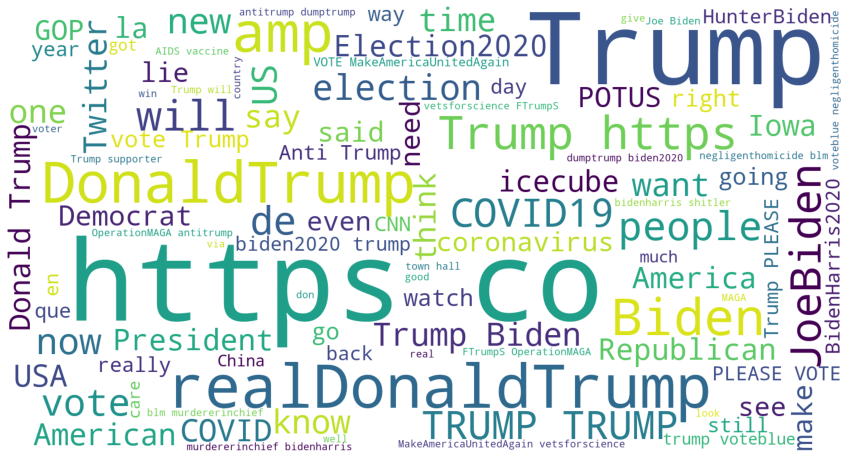

In [124]:
## applying wordcloud function over trump dataframe on 5000 tweets
wordcloud(trump['tweet'][:5000])

# Biden tweets sentiment analysis

In [106]:
biden_tweets=df.query('(candidate)=="Biden"').sort_values('user_followers_count', ascending=False).drop_duplicates(['user_name'])[['tweet','country']]
biden_tweets

,tweet,country
287365,Vote early! Vote Tuesday! Vote #Biden! #vote h...,NaN
636105,#Election2020 #PresidentElectJoe #JoeBiden htt...,NaN
738532,"Desde #California a #NuevaYork, muchos están c...",NaN
744750,Joe Biden dan Kamala Harris memang dalam pemil...,Indonesia
710408,President-elect #JoeBiden and Vice-President-e...,India
...,...,...
734356,"""Spread the hope.""\n~Joe Biden\n\n#joebiden #e...",NaN
284600,NEW GLOBAL UPDATE FOR OUR ELECTION GAME! START...,NaN
734349,@realDonaldTrump It’s like monopoly.. #JoeBide...,US
653112,IT’S OVER!\n#Biden #Harris #AmericaDecides htt...,The Netherlands


In [111]:
## getting the Tweets of US only
biden_tweets= biden_tweets.dropna().loc[biden_tweets.country == 'US']
biden_tweets.reset_index(inplace=True,drop=True)

In [112]:
biden_tweets

,tweet,country
0,#JoeBiden is enlisting A-list star power to he...,US
1,While we were campaigning across battleground ...,US
2,The big fight TODAY!!!!! @realDonaldTrump vs #...,US
3,News outlets have projected that #JoeBiden has...,US
4,"During his victory speech, #JoeBiden said he u...",US
...,...,...
57545,46th President of The Unites States! Congratul...,US
57546,Biden IS going to win tonight. #biden #Electio...,US
57547,All 238k deaths recorded in the United States ...,US
57548,Joe Biden'in başa gelmesi bizim bence işimize ...,US


In [113]:
## Cleaning all tweets by applying clean function here on tweets column

biden_tweets['cleantext']=biden_tweets['tweet'].apply(clean)

In [114]:
## we are applying getsubjectivity function over cleantxt

biden_tweets['subjectivity']=biden_tweets['cleantext'].apply(getsubjectivity)

In [115]:
## we are applying getpolarity function over cleantext

biden_tweets['polarity']= biden_tweets['cleantext'].apply(getpolarity)

In [116]:
## we are applying getanalysis function over polarity 

biden_tweets['analysis']=biden_tweets['polarity'].apply(getanalysis)

In [117]:
biden_tweets.head()

,tweet,country,cleantext,subjectivity,polarity,analysis
0,#JoeBiden is enlisting A-list star power to he...,US,joebiden enlisting list star power help close ...,0.00,0.00,neutral
1,While we were campaigning across battleground ...,US,campaigning across battleground state ran grea...,0.75,0.80,positive
2,The big fight TODAY!!!!! @realDonaldTrump vs #...,US,big fight today realdonaldtrump v joebiden got...,0.10,0.00,neutral
3,News outlets have projected that #JoeBiden has...,US,news outlet projected joebiden secured elector...,0.00,0.00,neutral
4,"During his victory speech, #JoeBiden said he u...",US,victory speech joebiden said understood trump ...,0.75,-0.75,negative


In [118]:
## Getting the percentage of analysis
biden_tweets.analysis.value_counts(normalize=True)*100

neutral     46.997394
positive    38.748914
negative    14.253692
Name: analysis, dtype: float64

Text(0, 0.5, 'percentage of tweets')

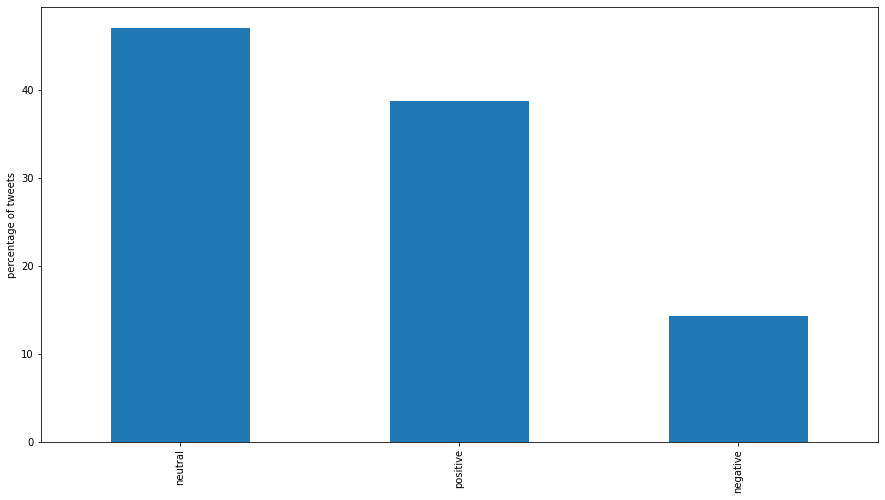

In [121]:
## Plotting the same
plt.figure(figsize=(15,8))
(biden_tweets.analysis.value_counts(normalize=True)*100).plot.bar()
plt.ylabel("percentage of tweets")

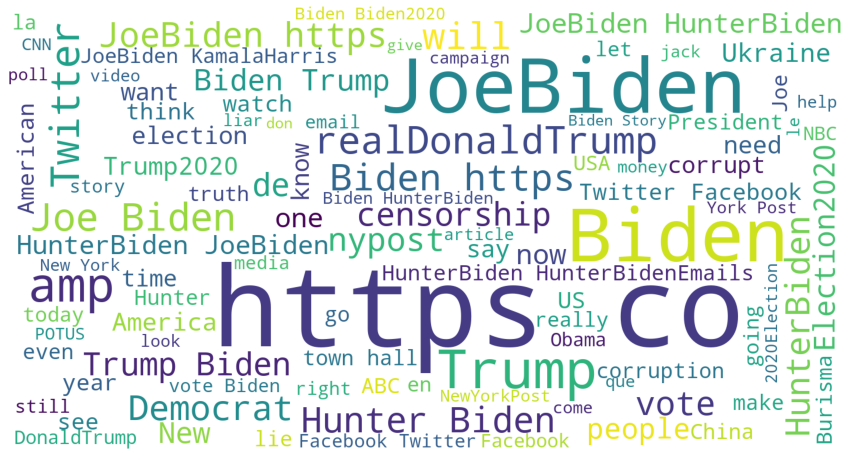

In [125]:
## applying wordcloud function over biden dataframe on 5000 tweets
wordcloud(biden['tweet'][:5000])